
## Objetivo
O objetivo deste exercício é classificar imagens através do uso de rede neural. Vamos treinar um modelo de rede neural para classificação de imagens de roupas. Teremos uma visão geral do uso do TensorFlow.

In [1]:
# TensorFlow e tf.Keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
# Importar a base de dados Fashion MNIST

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

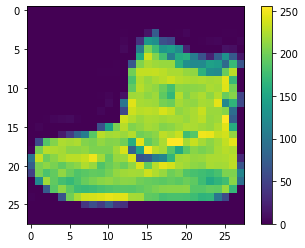

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

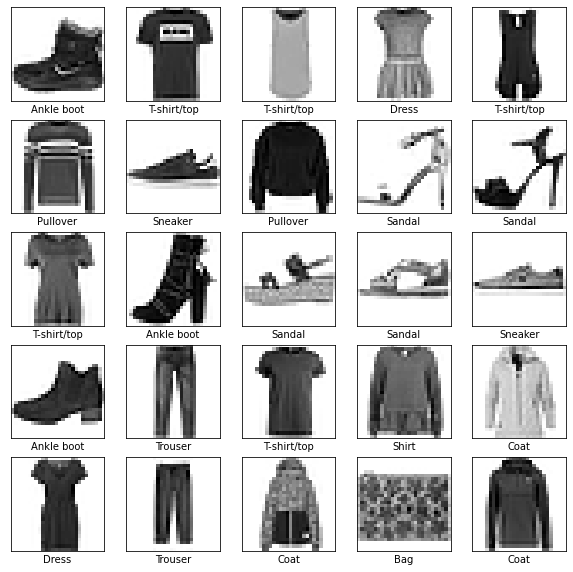

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()  

### Construindo o modelo 
Construir a rede neural requer configurar as camadas do modelo e, depois, compilar o modelo. 

### Montar as Camadas
O principal bloco de construção da rede neural é a camada (layer). As camadas (layers) extraem representações dos dados inseridos na rede.


In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4979 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2775 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2688 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2475 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

### Avaliando a Acurácia do Modelo

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3505 - accuracy: 0.8801

Test accuracy: 0.8801000118255615


### Fazendo Predições

In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([1.1308549e-06, 1.8380265e-10, 7.6233441e-08, 1.9687965e-09,
       1.0387110e-06, 2.5825921e-02, 4.1740799e-07, 3.4570225e-02,
       2.2365840e-07, 9.3960094e-01], dtype=float32)

A predição é um array de 10 números. Eles representam uma confiança do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver que cada label tem um maior valor de confiança.

In [15]:
np.argmax(predictions[0])

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição.

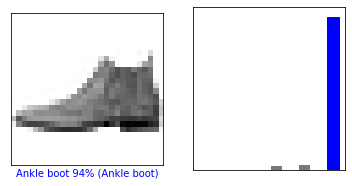

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

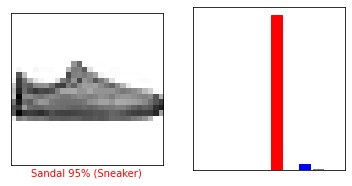

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

Vamos plotar algumas das previsões do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. 

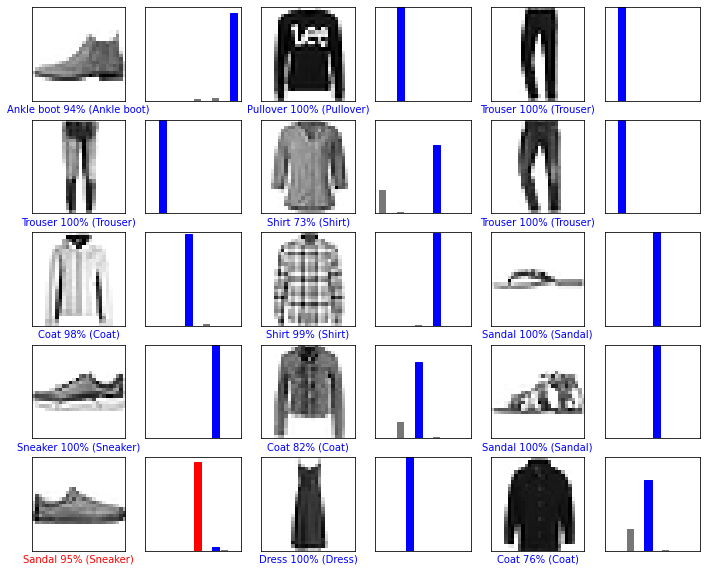

In [20]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras. 
# Colore as predições corretas de azul e as incorretas de vermelho.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finalmente, use o modelo treinado para fazer a predição de uma única imagem.

In [21]:
# Pegar uma imagem do dataset de teste.

img = test_images[0]

print(img.shape)

(28, 28)


Modelos tf.keras são otimizados para fazer predições em batch, ou coleções, de exemplos de uma vez. Assim, mesmo que usemos uma única imagem, precisamos adicionar em uma lista.

In [22]:
# Adiciona a imagem em um batch que possui um sõ membro.

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora faremos a predição da label correta para essa imagem.

In [23]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1308571e-06 1.8380301e-10 7.6233590e-08 1.9687927e-09 1.0387140e-06
  2.5825925e-02 4.1740878e-07 3.4570225e-02 2.2365840e-07 9.3960094e-01]]


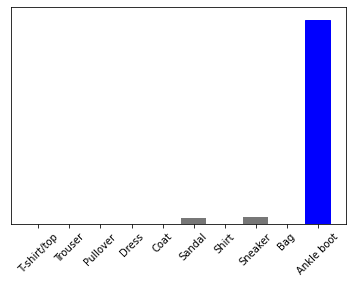

In [24]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict retorna a lista de listas — uma lista para cada imagem em um batch de dados. Pegue a predição de nossa (única) imagem no batch.

In [25]:
np.argmax(predictions_single[0])

9

E, como antes, o modelo previu a label como 9.
Usamos a base de dados Fashion MNIST, que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels). Fashion MNIST tem como intenção substituir a clássica base de dados MNIST. Usamos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. 